# set up

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir("/content/drive/MyDrive/KAIST/semester6/IE343/IE343 Kaggle")

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
INPUT_DIR='kaist-ie343-2023-spring'
OUTPUT_DIR='kaist-ie343-2023-spring'

## Do not change this cell. 
## The reason for this is to prevent cheating using the original data from DACON. 
## If an assertion error occurs in that cell when TAs evaluate the submitted code of each student, it is considered cheating.

train = pd.read_csv(os.path.join(INPUT_DIR, 'train.csv'))
test = pd.read_csv(os.path.join(INPUT_DIR, 'test.csv'))
park = pd.read_csv(os.path.join(INPUT_DIR, 'park.csv'))
dcc = pd.read_csv(os.path.join(INPUT_DIR, 'day_care_center.csv'))

assert train.shape[0] == 329690 and train.shape[1] == 13, 'Do not change the format of the input data.'
assert test.shape[0] == 85097 and test.shape[1] == 12, 'Do not change the format of the input data.'
assert park.shape[0] == 1359 and park.shape[1] == 7, 'Do not change the format of the input data.'
assert dcc.shape[0] == 7373 and dcc.shape[1] == 10, 'Do not change the format of the input data.'
print(train.shape, test.shape, park.shape, dcc.shape)

(329690, 13) (85097, 12) (1359, 7) (7373, 10)


In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 8.3 MB/s eta 0:00:00


# park analysis

In [ ]:
df_t = dcc.groupby("gu").count()["city"]
gu_dcc_num_dict =  dict(df_t)

df = park[["dong", "gu"]]
df_grouped = df.groupby('dong')['gu'].agg(lambda x: pd.Series.mode(x)[0])

# Convert the Series to a dictionary
dong_to_gu_dict = df_grouped.to_dict()

# dong_to_gu_dict
train.dong.map(dong_to_gu_dict).map(gu_dcc_num_dict)

0         127
1         127
2         127
3         127
4         127
         ... 
329685    204
329686    204
329687    204
329688    204
329689    204
Name: dong, Length: 329690, dtype: int64

# data analysis

In [ ]:
# train.dong.value_counts()
# df_ids = train.apartment_id.value_counts()
# ids = np.array(df_ids[df_ids>100].index)
# def map_app_ids (id):
#   if id in ids:
#     return  id
#   else: 
#     return -1


109    11665
195     8363
228     8145
198     6488
138     6209
       ...  
204       35
212       17
74        11
177        6
176        4
Name: dong, Length: 203, dtype: int64

In [ ]:
df_t = train.copy()
df_t

,index,apartment_id,city,dong,house_area,built_year,floor,lat,long,transaction_year,transaction_month,transaction_day,PRICE
0,0,0,busan,197,125.865988,1993,5,35.149929,129.006071,2021,7,11~20,229250.80
1,1,0,busan,197,101.647190,1993,12,35.149929,129.006071,2021,10,1~10,215320.00
2,2,0,busan,197,91.511175,1993,6,35.149929,129.006071,2020,3,21~31,161740.00
3,3,0,busan,197,101.647190,1993,13,35.149929,129.006071,2020,5,11~20,199781.80
4,4,0,busan,197,101.647190,1993,4,35.149929,129.006071,2022,6,21~30,219606.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
329685,329685,4419,seoul,37,101.431912,2014,4,37.452039,127.070842,2022,5,21~31,885070.00
329686,329686,4419,seoul,37,101.431912,2014,14,37.452039,127.070842,2021,10,1~10,826132.00
329687,329687,4419,seoul,37,71.687641,2014,2,37.452039,127.070842,2022,11,21~30,697540.00
329688,329688,4419,seoul,37,137.192013,2014,18,37.452039,127.070842,2020,9,21~30,870656.98


0         1
1         1
2         1
3         1
4         1
         ..
329685    0
329686    0
329687    0
329688    0
329689    0
Name: city, Length: 329690, dtype: int32

In [ ]:
is_busan = (df_t["city"]=="busan").astype(np.int32)
df_t["bus_lat"] = df_t["lat"]*is_busan
df_t["bus_long"] = df_t["long"]*is_busan

df_t["seoul_lat"] = df_t["lat"]*(1-is_busan)
df_t["seoul_long"] = df_t["long"]*(1-is_busan)

df_t

,index,apartment_id,city,dong,house_area,built_year,floor,lat,long,transaction_year,transaction_month,transaction_day,PRICE,bus_lat,bus_long,seoul_lat,seoul_long
0,0,0,busan,197,125.865988,1993,5,35.149929,129.006071,2021,7,11~20,229250.80,35.149929,129.006071,0.000000,0.000000
1,1,0,busan,197,101.647190,1993,12,35.149929,129.006071,2021,10,1~10,215320.00,35.149929,129.006071,0.000000,0.000000
2,2,0,busan,197,91.511175,1993,6,35.149929,129.006071,2020,3,21~31,161740.00,35.149929,129.006071,0.000000,0.000000
3,3,0,busan,197,101.647190,1993,13,35.149929,129.006071,2020,5,11~20,199781.80,35.149929,129.006071,0.000000,0.000000
4,4,0,busan,197,101.647190,1993,4,35.149929,129.006071,2022,6,21~30,219606.40,35.149929,129.006071,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329685,329685,4419,seoul,37,101.431912,2014,4,37.452039,127.070842,2022,5,21~31,885070.00,0.000000,0.000000,37.452039,127.070842
329686,329686,4419,seoul,37,101.431912,2014,14,37.452039,127.070842,2021,10,1~10,826132.00,0.000000,0.000000,37.452039,127.070842
329687,329687,4419,seoul,37,71.687641,2014,2,37.452039,127.070842,2022,11,21~30,697540.00,0.000000,0.000000,37.452039,127.070842
329688,329688,4419,seoul,37,137.192013,2014,18,37.452039,127.070842,2020,9,21~30,870656.98,0.000000,0.000000,37.452039,127.070842


# inflation adjustment

<ipython-input-7-ec179c7f29f3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = train.groupby("transaction_year").mean()["PRICE"]


{2018: 1.2791254174647047,
 2019: 1.2576299204650916,
 2020: 1.198718876547877,
 2021: 1.1136705032908139,
 2022: 1}

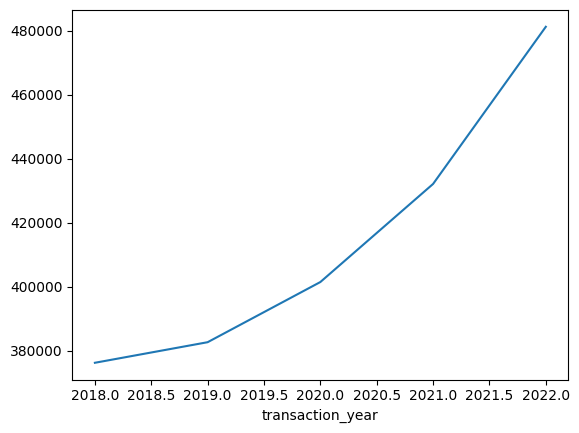

In [ ]:
df = train.groupby("transaction_year").mean()["PRICE"]
df.plot()
mean_prices = list(df)
mean_prices
inflation_adjustion = [ (mean_prices[4])/mean_prices[i] for i in range(4)] + [1]


inflation_adjustion_dick = dict(zip ([2018, 2019, 2020, 2021, 2022], inflation_adjustion))
inflation_adjustion_dick

# dataset pre procc

In [ ]:
train.head()

,index,apartment_id,city,dong,house_area,built_year,floor,lat,long,transaction_year,transaction_month,transaction_day,PRICE
0,0,0,busan,197,125.865988,1993,5,35.149929,129.006071,2021,7,11~20,229250.8
1,1,0,busan,197,101.647190,1993,12,35.149929,129.006071,2021,10,1~10,215320.0
2,2,0,busan,197,91.511175,1993,6,35.149929,129.006071,2020,3,21~31,161740.0
3,3,0,busan,197,101.647190,1993,13,35.149929,129.006071,2020,5,11~20,199781.8
4,4,0,busan,197,101.647190,1993,4,35.149929,129.006071,2022,6,21~30,219606.4


In [ ]:
df_t = dcc.groupby("gu").count()["city"]
gu_dcc_num_dict =  dict(df_t)

df = park[["dong", "gu"]]
df_grouped = df.groupby('dong')['gu'].agg(lambda x: pd.Series.mode(x)[0])

# Convert the Series to a dictionary
dong_to_gu_dict = df_grouped.to_dict()

# dong_to_gu_dict
train.dong.map(dong_to_gu_dict).map(gu_dcc_num_dict)

0         127
1         127
2         127
3         127
4         127
         ... 
329685    204
329686    204
329687    204
329688    204
329689    204
Name: dong, Length: 329690, dtype: int64

In [ ]:
df_t = park.groupby("dong").count()["city"]
dong_park_num_dict = dict(df_t)
df_t = park.groupby("dong").sum()["park_area"]
dong_park_area_dict = dict(df_t)

<ipython-input-10-d3cacdcaf7b5>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_t = park.groupby("dong").sum()["park_area"]


In [ ]:
dong_mean_price_dict = dict(train.groupby("dong")["PRICE"].mean())
dong_mean_price_dict

{0: 593889.9797331163,
 1: 266659.3818181818,
 2: 232350.8322095672,
 3: 341457.218474196,
 4: 300138.25625000003,
 5: 153720.67265734266,
 6: 173445.40027906976,
 7: 462363.864957377,
 8: 193666.23842004075,
 9: 362664.4363955119,
 10: 780260.6354357824,
 11: 394138.7841149653,
 12: 328125.41652551683,
 13: 566847.6970996138,
 14: 345054.6717525773,
 15: 421501.2658227848,
 16: 229892.33587827426,
 17: 685332.6745768567,
 18: 244389.43000000002,
 19: 189679.38663303189,
 20: 329976.3471208791,
 21: 320761.1706772908,
 22: 304002.97228397045,
 23: 576765.8970494037,
 24: 158330.9337363344,
 25: 182860.24448398576,
 26: 450998.42746268655,
 27: 350163.0,
 28: 174111.59150585873,
 29: 149080.72537313434,
 30: 361042.2228327869,
 31: 260909.26860683082,
 32: 465233.7533229269,
 33: 215235.056097561,
 34: 189048.52891217257,
 35: 408650.1434270123,
 36: 487339.59433962265,
 37: 800066.8066141732,
 38: 476761.4748141026,
 39: 434065.18176785717,
 40: 365926.45861756377,
 42: 810978.69119266

In [ ]:
app_id_count_less_then = 10


df_ids = train.apartment_id.value_counts()
ids = np.array(df_ids[df_ids>app_id_count_less_then].index)
def map_app_ids (id):
  if id in ids:
    return  id
  else: 
    return -1
  
df_t = train.apartment_id.map(map_app_ids)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Load some data
# Load some data

def get_features_train(df , features_to_del = None):
  if features_to_del is None:
    features_to_del = []
  
  X = df.drop(['index'], axis = 1)

  X['transaction_day'] = X['transaction_day'].map({'1~10': 1, '11~20': 2, '21~31': 3, "21~30":3,"21~28":3,"21~29":3,})
  X['transaction_time'] = X["transaction_year"] + (X["transaction_month"]-1)/12
  X['apartment_id'] = X['apartment_id'].map(map_app_ids)

  X['dong_mean_price'] = X['dong'].map(dong_mean_price_dict)

  X['building_age'] = X['transaction_time']-X['built_year']
  X['dong_park_num'] = X['dong'].map(dong_park_num_dict)
  X['dong_park_area'] = X['dong'].map(dong_park_area_dict)
  X['dong_dcc_num'] = X['dong'].map(dong_to_gu_dict).map(gu_dcc_num_dict)
  

  split_long_lat = True
  if split_long_lat: 
    is_busan = (X["city"]=="busan").astype(np.int32)
    X["bus_lat"] = X["lat"]*is_busan
    X["bus_long"] = X["long"]*is_busan
    X["seoul_lat"] = X["lat"]*(1-is_busan)
    X["seoul_long"] = X["long"]*(1-is_busan)

    X = X.drop(['lat', 'long'], axis = 1)

  X = X.drop(features_to_del, axis = 1)

  return X


def get_train_val_data( features_to_del = None, test_size=0.3, random_state=42):

  df = train.copy()
  y = df["PRICE"]

  adjust_to_inflation = False
  
  if adjust_to_inflation:
    y = y * train["transaction_year"].map(inflation_adjustion_dick)

  df = df.drop('PRICE', axis = 1)
  X = get_features_train(df, features_to_del)

  X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=test_size, random_state=random_state)
  return X_train, X_valid, y_train, y_valid


# train 

In [ ]:
# import optuna
from catboost import CatBoostRegressor
# from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


In [ ]:
X_train, X_valid, y_train, y_valid = get_train_val_data( test_size=0.3, random_state=42)

In [ ]:
X_train.apartment_id.value_counts()


-1       2808
 368      979
 2707     872
 4384     733
 3966     710
         ... 
 1899       5
 2393       5
 62         5
 4242       3
 2192       2
Name: apartment_id, Length: 3857, dtype: int64

In [ ]:
# X_train, X_valid, y_train, y_valid = get_train_val_data( test_size=0.3, random_state=42)
cat_features = ["city",	"dong", "apartment_id"]
X_train

,apartment_id,city,dong,house_area,built_year,floor,transaction_year,transaction_month,transaction_day,transaction_time,dong_mean_price,building_age,dong_park_num,dong_park_area,dong_dcc_num,bus_lat,bus_long,seoul_lat,seoul_long
266915,3610,seoul,179,100.965476,2011,6,2022,11,2,2022.833333,4.022878e+05,11.833333,9,802.008495,283,0.000000,0.000000,37.592657,126.921611
315915,4254,busan,170,101.623270,1991,8,2020,2,2,2020.083333,3.495621e+05,29.083333,6,1791.434934,143,35.119025,129.112653,0.000000,0.000000
124041,1640,seoul,146,98.346258,1977,10,2022,8,2,2022.583333,1.641677e+06,45.583333,4,265.890116,223,0.000000,0.000000,37.532109,127.030016
77457,988,seoul,198,53.245475,1992,13,2020,4,2,2020.250000,3.442521e+05,28.250000,1,2309.603213,457,0.000000,0.000000,37.648020,127.076780
255858,3463,seoul,61,106.993265,1991,8,2021,1,1,2021.000000,3.041110e+05,30.000000,4,478.596386,168,0.000000,0.000000,37.468399,126.897957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,1584,busan,152,71.713474,2007,7,2021,4,1,2021.250000,2.701369e+05,14.250000,17,756.124304,97,35.183442,129.089934,0.000000,0.000000
259178,3523,busan,78,121.943140,2008,10,2021,5,2,2021.333333,3.809034e+05,13.333333,25,1941.754346,997,35.107136,128.917942,0.000000,0.000000
131932,1753,busan,56,75.598528,1980,4,2021,5,2,2021.333333,1.492364e+05,41.333333,12,936.064901,188,35.212214,129.011554,0.000000,0.000000
146867,1971,busan,195,71.436483,1996,1,2022,8,1,2022.583333,2.832146e+05,26.583333,13,705.142308,223,35.178180,129.175997,0.000000,0.000000


In [ ]:
param = {'iterations': 282, 'depth': 10, 'learning_rate': 0.09954501286322029, 'random_strength': 7, 'bagging_temperature': 0.01563641973518426, 'od_type': 'Iter', 'od_wait': 44}

# param = {'iterations': 300, 'depth': 10, 'learning_rate': 0.0995, 'random_strength': 7, 'bagging_temperature': 0.01563641973518426, 'od_type': 'Iter', 'od_wait': 44}

param = {'iterations': 1500, 'depth': 12, 'learning_rate': 0.0995, 'random_strength': 7, 'bagging_temperature': 0.01563641973518426, 'od_type': 'Iter', 'od_wait': 44}
# test: 20112.9456712 ( app_id_count_less_then = 100 )

param = {'iterations': 1500, 'depth': 12, 'learning_rate': 0.0995, 'random_strength': 7, 'bagging_temperature': 0.01563641973518426, 'od_type': 'Iter', 'od_wait': 44}
# test: 19323.3915496 (app_id_count_less_then = 50)

param = {'iterations': 1500, 'depth': 12, 'learning_rate': 0.0995, 'random_strength': 7, 'bagging_temperature': 0.01563641973518426, 'od_type': 'Iter', 'od_wait': 44}
# test: 18463.0983 (app_id_count_less_then = 20)

param = {'iterations': 1500, 'depth': 12, 'learning_rate': 0.0995, 'random_strength': 7, 'bagging_temperature': 0.01563641973518426, 'od_type': 'Iter', 'od_wait': 44}
# test: 18403.9105827 (app_id_count_less_then = 10)

param = {'iterations': 1500, 'depth': 12, 'learning_rate': 0.0995, 'random_strength': 7, 'bagging_temperature': 0.01563641973518426, 'od_type': 'Iter', 'od_wait': 44}
# test: 18496.6296 (app_id_count_less_then = 0)

param = {'iterations': 1500, 'depth': 12, 'learning_rate': 0.0995, 'random_strength': 7, 'bagging_temperature': 0.01563641973518426, 'od_type': 'Iter', 'od_wait': 44}
# test: 18534.48723  (app_id_count_less_then = 10) + building age


param = {'iterations': 1500, 'depth': 12, 'learning_rate': 0.0995, 'random_strength': 7, 'bagging_temperature': 0.01563641973518426, 'od_type': 'Iter', 'od_wait': 44}
# test: 18534.48723  (app_id_count_less_then = 10) + building age


param = {'iterations': 1500, 'depth': 12, 'learning_rate': 0.0995, 'random_strength': 7, 'bagging_temperature': 0.01563641973518426, 'od_type': 'Iter', 'od_wait': 44}
# test: 18465.83672 (app_id_count_less_then = 10) + building age + split_long_lat by city 



# param = {'iterations': 2500, 'depth': 10, 'learning_rate': 0.0995, 'random_strength': 7, 'bagging_temperature': 0.01563641973518426, 'od_type': 'Iter', 'od_wait': 44}
# test: 20032.6684259  learn: 15917.7006972	 (app_id_count_less_then = 100)


# param = {'iterations': 2500, 'depth': 12, 'learning_rate': 0.0995, 'random_strength': 7, 'bagging_temperature': 0.01563641973518426, 'od_type': 'Iter', 'od_wait': 44}
# test: 19374.3950984  learn: 11988.5400224	 (app_id_count_less_then = 100)

# param = {'iterations': 2500, 'depth': 12, 'learning_rate': 0.0995, 'random_strength': 7, 'bagging_temperature': 0.01563641973518426, 'od_type': 'Iter', 'od_wait': 44}
# test: 17939.50018 (app_id_count_less_then = 10)


param = {'iterations': 2500, 'depth': 12, 'learning_rate': 0.0995, 'random_strength': 7, 'bagging_temperature': 0.01563641973518426, 'od_type': 'Iter', 'od_wait': 44}
# test: 17958.30022 (app_id_count_less_then = 10) + building age + split_long_lat by city 

param = {'iterations': 2500, 'depth': 12, 'learning_rate': 0.0995, 'random_strength': 7, 'bagging_temperature': 0.01563641973518426, 'od_type': 'Iter', 'od_wait': 44}
# test: 20490.40669429518 (app_id_count_less_then = 10) + building age + split_long_lat by city + inflation_adjust = True


param = {'iterations': 2500, 'depth': 11, 'learning_rate': 0.0955, 'random_strength': 0, 'bagging_temperature': 0.0821, 'l2_leaf_reg': 0.7328, 'min_data_in_leaf': 43}
# 2499:	learn: 10645.0477895	test: 17702.2251610	best: 17702.1992781 (2498)	total: 2m 31s	remaining: 0us
# test: 17702.19928 (app_id_count_less_then = 10) + include everything + inflation_adjust = False

param = {'iterations': 2500, 'depth': 11, 'learning_rate': 0.0995, 'random_strength': 0, 'bagging_temperature': 0.0821, 'od_type': 'Iter', 'od_wait': 44}
# 2499:	learn: 11836.9464649	test: 17740.5875014	best: 17740.5875014 (2499)	total: 2m 38s	remaining: 0us
# test: 17740.5875 (app_id_count_less_then = 10) + include everything + inflation_adjust = False

param = {'iterations': 2500, 'depth': 8, 'learning_rate': 0.0995, 'random_strength': 0, 'bagging_temperature': 0.0821, 'od_type': 'Iter', 'od_wait': 44}
# 2499:	learn: 17555.0244862	test: 19545.6143650	best: 19545.6143650 (2499)	total: 1m 16s	remaining: 0us
# test: 19545.61437 (app_id_count_less_then = 10) + include everything + inflation_adjust = False


param = {'iterations': 5000, 'depth': 8, 'learning_rate': 0.0995, 'random_strength': 0, 'bagging_temperature': 0.0821, 'od_type': 'Iter', 'od_wait': 44}
# 4999:	learn: 14438.2444807	test: 17945.9243127	best: 17945.9243127 (4999)	total: 2m 32s	remaining: 0us
# test: 17945.9243127 (app_id_count_less_then = 10) + include everything + inflation_adjust = False


param = {'iterations': 1500, 'depth': 12, 'learning_rate': 0.0995, 'random_strength': 7, 'bagging_temperature': 0.01563641973518426, 'od_type': 'Iter', 'od_wait': 44}
# 1499:	learn: 13249.8743842	test: 18507.7333657	best: 18507.4991254 (1497)	total: 2m 13s	remaining: 0us
# bestTest = 18507.49913


param = {'iterations': 1500, 'depth': 12, 'learning_rate': 0.0995, 'random_strength': 7, 'bagging_temperature': 0.01563641973518426, 'od_type': 'Iter', 'od_wait': 44}
# 1499:	learn: 13249.8743842	test: 18507.7333657	best: 18507.4991254 (1497)	total: 2m 13s	remaining: 0us
# bestTest = 18507.49913

param = {'iterations': 1500, 'depth': 12, 'learning_rate': 0.0995, 'random_strength': 7, 'bagging_temperature': 0.01563641973518426, 'od_type': 'Iter', 'od_wait': 44}
# 1499:	learn: 13062.3505544	test: 18361.7771037	best: 18360.6291971 (1496)	total: 2m 6s	remaining: 0us
# bestTest = 18360.6292 same + dong_mean_price


model = CatBoostRegressor(**param, 
                          loss_function='RMSE', 
                          eval_metric='MAE', 
                          task_type='GPU', 
                          verbose=True)


model.fit(X_train, y_train, 
          eval_set=(X_valid, y_valid), 
          cat_features = cat_features,
          early_stopping_rounds=100)

preds = model.predict(X_valid)
mae = mean_absolute_error(y_valid, preds)
print (mae)


Default metric period is 5 because MAE is/are not implemented for GPU


0:	learn: 199264.1179983	test: 198886.1714540	best: 198886.1714540 (0)	total: 124ms	remaining: 3m 6s
1:	total: 230ms	remaining: 2m 52s
2:	total: 310ms	remaining: 2m 34s
3:	total: 380ms	remaining: 2m 22s
4:	total: 440ms	remaining: 2m 11s
5:	learn: 128792.7577335	test: 127625.7953835	best: 127625.7953835 (5)	total: 512ms	remaining: 2m 7s
6:	total: 570ms	remaining: 2m 1s
7:	total: 632ms	remaining: 1m 57s
8:	total: 698ms	remaining: 1m 55s
9:	total: 746ms	remaining: 1m 51s
10:	learn: 88701.3050355	test: 87481.0963835	best: 87481.0963835 (10)	total: 806ms	remaining: 1m 49s
11:	total: 873ms	remaining: 1m 48s
12:	total: 933ms	remaining: 1m 46s
13:	total: 997ms	remaining: 1m 45s
14:	total: 1.06s	remaining: 1m 45s
15:	learn: 67880.1787653	test: 66725.8990365	best: 66725.8990365 (15)	total: 1.08s	remaining: 1m 40s
16:	total: 1.15s	remaining: 1m 39s
17:	total: 1.23s	remaining: 1m 41s
18:	total: 1.29s	remaining: 1m 40s
19:	total: 1.35s	remaining: 1m 40s
20:	learn: 55997.9486877	test: 54986.8908773	

In [ ]:
print ("With inflation adjustment: ")
dict(zip(X_train.columns, model.feature_importances_))

With inflation adjustment: 


{'apartment_id': 11.797710922195014,
 'city': 1.0221931147283352,
 'dong': 6.2054907003061235,
 'house_area': 29.88271193460841,
 'built_year': 9.592707044059871,
 'floor': 2.401163222215178,
 'transaction_year': 4.730570131115344,
 'transaction_month': 1.2061294513941967,
 'transaction_day': 0.3338869088785687,
 'dong_mean_price': 25.444356728765797,
 'bus_lat': 0.17410130725377926,
 'bus_long': 0.3495736607036237,
 'seoul_lat': 3.32061318509147,
 'seoul_long': 3.538791688684494}

In [ ]:
print ("With inflation adjustment: ")
dict(zip(X_train.columns, model.feature_importances_))

With inflation adjustment: 


{'apartment_id': 12.554740561250904,
 'city': 0.0,
 'dong': 9.188655259329316,
 'house_area': 28.252993310240647,
 'built_year': 6.361748668906994,
 'floor': 2.4153046451454427,
 'transaction_year': 0.11548015426250761,
 'transaction_month': 0.1443368600633374,
 'transaction_day': 0.07880298224503553,
 'transaction_time': 3.2964751759273145,
 'building_age': 1.5176965353400445,
 'dong_park_num': 1.2643614029197505,
 'dong_park_area': 1.6303725710190748,
 'dong_dcc_num': 5.650016760034021,
 'bus_lat': 0.10217947757146853,
 'bus_long': 0.1711439510831546,
 'seoul_lat': 9.798234260860745,
 'seoul_long': 17.457457423800438}

In [ ]:
print ("With inflation adjustment: ")
dict(zip(X_train.columns, model.feature_importances_))

With inflation adjustment: 


{'apartment_id': 11.670930104124329,
 'city': 0.5542908840114052,
 'dong': 11.069440598945443,
 'house_area': 31.000385904459787,
 'built_year': 6.590527397218096,
 'floor': 3.448211703228526,
 'transaction_year': 0.8573325165734635,
 'transaction_month': 0.8960270229586732,
 'transaction_day': 0.43358087492779523,
 'transaction_time': 0.9682784886746584,
 'building_age': 2.0172154664799304,
 'bus_lat': 0.21773967538870106,
 'bus_long': 0.5165064753113341,
 'seoul_lat': 11.054393398440352,
 'seoul_long': 18.70513948925739}

In [ ]:
dict(zip(X_train.columns, model.feature_importances_))

{'apartment_id': 11.831978814822897,
 'city': 0.5351234007611589,
 'dong': 12.007148940982646,
 'house_area': 31.22199146149635,
 'built_year': 6.251133563492678,
 'floor': 3.100829265026328,
 'transaction_year': 2.499376625415747,
 'transaction_month': 0.6874095207129042,
 'transaction_day': 0.32865797920593454,
 'transaction_time': 1.7826188172977009,
 'building_age': 1.7148819255278687,
 'bus_lat': 0.1345831395452858,
 'bus_long': 0.42867313404817053,
 'seoul_lat': 9.01820062601347,
 'seoul_long': 18.45739278565083}

# model features select

In [ ]:
X_train, X_valid, y_train, y_valid = get_train_val_data( test_size=0.3, random_state=None)
cat_features = ["city",	"dong", "apartment_id"]



param = {'iterations': 1500, 'depth': 12, 'learning_rate': 0.0995, 'random_strength': 7, 'bagging_temperature': 0.01563641973518426, 'od_type': 'Iter', 'od_wait': 44}
# 1499:	learn: 13062.3505544	test: 18361.7771037	best: 18360.6291971 (1496)	total: 2m 6s	remaining: 0us
# bestTest = 18360.6292 same + dong_mean_price


model = CatBoostRegressor(**param, 
                          loss_function='RMSE', 
                          eval_metric='MAE', 
                          task_type='GPU', 
                          cat_features = cat_features,
                          # early_stopping_rounds=100,
                          verbose=True, )



In [ ]:
model.select_features(X_train, y_train, 
          eval_set=(X_valid, y_valid), 
          features_for_select = X_train.columns,
          steps = 20,
          num_features_to_select = 15,
          )


Default metric period is 5 because MAE is/are not implemented for GPU


Step #1 out of 1
0:	learn: 200274.7047400	test: 199890.6350410	best: 199890.6350410 (0)	total: 123ms	remaining: 3m 3s
1:	total: 225ms	remaining: 2m 48s
2:	total: 300ms	remaining: 2m 29s
3:	total: 368ms	remaining: 2m 17s
4:	total: 426ms	remaining: 2m 7s
5:	learn: 129269.5917464	test: 128682.0040644	best: 128682.0040644 (5)	total: 496ms	remaining: 2m 3s
6:	total: 555ms	remaining: 1m 58s
7:	total: 616ms	remaining: 1m 54s
8:	total: 684ms	remaining: 1m 53s
9:	total: 746ms	remaining: 1m 51s
10:	learn: 88458.6506285	test: 87651.3955130	best: 87651.3955130 (10)	total: 806ms	remaining: 1m 49s
11:	total: 882ms	remaining: 1m 49s
12:	total: 944ms	remaining: 1m 47s
13:	total: 1s	remaining: 1m 46s
14:	total: 1.09s	remaining: 1m 47s
15:	learn: 66518.9659897	test: 65657.3856249	best: 65657.3856249 (15)	total: 1.15s	remaining: 1m 46s
16:	total: 1.18s	remaining: 1m 43s
17:	total: 1.24s	remaining: 1m 42s
18:	total: 1.31s	remaining: 1m 42s
19:	total: 1.37s	remaining: 1m 41s
20:	learn: 55211.0434477	test: 

In [ ]:
model = CatBoostRegressor(**param, 
                          loss_function='RMSE', 
                          eval_metric='MAE', 
                          task_type='GPU', 
                          cat_features = cat_features,
                          # early_stopping_rounds=100,
                          verbose=True, )


model.select_features(X_train, y_train, 
          eval_set=(X_valid, y_valid), 
          features_for_select = X_train.columns,
          steps = 20,
          num_features_to_select = 15,
          )


In [ ]:
len(X_train.columns)

19

# run optimum

In [ ]:
import optuna
from catboost import CatBoostRegressor
# from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Load some data
# Load some data


X_train, X_valid, y_train, y_valid = get_train_val_data( test_size=0.3, random_state=42)
cat_features = ["city",	"dong", "apartment_id"]


def objective(trial):
    param = {
        'iterations': 2500,
        'depth': trial.suggest_int('depth', 10, 14),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
        'random_strength': trial.suggest_int('random_strength', 0, 100),
        'bagging_temperature': trial.suggest_loguniform('bagging_temperature', 0.01, 0.1),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.3, 30),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 100),
    }
    
    model = CatBoostRegressor(**param, 
                              loss_function='RMSE', 
                              eval_metric='MAE', 
                              task_type='GPU', 
                              verbose=False)

    model.fit(X_train, y_train, 
              eval_set=(X_valid, y_valid), 
              cat_features = cat_features,
              early_stopping_rounds=100)

    preds = model.predict(X_valid)
    mae = mean_absolute_error(y_valid, preds)
    
    return mae

study = optuna.create_study(direction='minimize') # you should minimize the MAE
study.optimize(objective, n_trials=100)

print('Best trial: score {}, params {}'.format(study.best_trial.value, study.best_trial.params))


[I 2023-05-29 16:30:45,624] A new study created in memory with name: no-name-9fe44a36-04d9-4200-bc1f-db06f1fd500f
<ipython-input-322-e7ca9a36cb3d>:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
<ipython-input-322-e7ca9a36cb3d>:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'bagging_temperature': trial.suggest_loguniform('bagging_temperature', 0.01, 100.00),
<ipython-input-322-e7ca9a36cb3d>:24: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~op

KeyboardInterrupt: ignored

In [ ]:
# Trial 14 finished with value: 18364.55828094373 and parameters: {'depth': 11, 'learning_rate': 0.08053421185446756, 'random_strength': 100, 'bagging_temperature': 0.04599577941109508, 'od_type': 'IncToDec', 'od_wait': 41}. Best is trial 14 with value: 18364.55828094373.
# Trial 20 finished with value: 17879.86250941479 and parameters: {'depth': 12, 'learning_rate': 0.06826314061471614, 'random_strength': 2, 'bagging_temperature': 0.0785269818685941, 'od_type': 'IncToDec', 'od_wait': 45}. Best is trial 20 with value: 17879.862509414797.
# Trial 21 finished with value: 17815.76842507288 and parameters: {'depth': 12, 'learning_rate': 0.06668074088560585, 'random_strength': 0, 'bagging_temperature': 0.08233292775467742, 'od_type': 'IncToDec', 'od_wait': 45}. Best is trial 21 with value: 17815.76842507288.
# Trial 22 finished with value: 17914.91652908328 and parameters: {'depth': 12, 'learning_rate': 0.06285727127519936, 'random_strength': 6, 'bagging_temperature': 0.07656426728915998, 'od_type': 'IncToDec', 'od_wait': 45}. Best is trial 21 with value: 17815.76842507288.
# Trial 23 finished with value: 18535.45697976495 and parameters: {'depth': 14, 'learning_rate': 0.03274024142971415, 'random_strength': 2, 'bagging_temperature': 0.33237726366549286, 'od_type': 'IncToDec', 'od_wait': 45}. Best is trial 21 with value: 17815.76842507288.
# Trial 24 finished with value: 18146.12904973445 and parameters: {'depth': 12, 'learning_rate': 0.06180543829967158, 'random_strength': 12, 'bagging_temperature': 0.09720601676488506, 'od_type': 'IncToDec', 'od_wait': 48}. Best is trial 21 with value: 17815.76842507288.
# Trial 25 finished with value: 19358.03444611342 and parameters: {'depth': 12, 'learning_rate': 0.034941789067328255, 'random_strength': 14, 'bagging_temperature': 0.5641295539206497, 'od_type': 'IncToDec', 'od_wait': 46}. Best is trial 21 with value: 17815.76842507288.
# Trial 26 finished with value: 18333.43350059021 and parameters: {'depth': 13, 'learning_rate': 0.06307877056098145, 'random_strength': 15, 'bagging_temperature': 0.16674957786179273, 'od_type': 'IncToDec', 'od_wait': 43}. Best is trial 21 with value: 17815.76842507288.
# Trial 27 finished with value: 18208.96397775526 and parameters: {'depth': 14, 'learning_rate': 0.039057480046176055, 'random_strength': 0, 'bagging_temperature': 0.086664816552, 'od_type': 'IncToDec', 'od_wait': 35}. Best is trial 21 with value: 17815.76842507288.




In [ ]:
import optuna
from catboost import CatBoostRegressor
# from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Load some data
# Load some data


X_train, X_valid, y_train, y_valid = get_train_val_data( test_size=0.3, random_state=42)
cat_features = ["city",	"dong", "apartment_id"]


def objective(trial):
    param = {
        'iterations': 2500,
        'depth': trial.suggest_int('depth', 10, 14),
        # 'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'random_strength': trial.suggest_int('random_strength', 0, 100),
        # 'bagging_temperature': trial.suggest_loguniform('bagging_temperature', 0.01, 100.00),
        'bagging_temperature': trial.suggest_loguniform('bagging_temperature', 0.03, 0.3),

        # 'od_type': trial.suggest_categorical('od_type', ['IncToDec', 'Iter']),
        # 'od_wait': trial.suggest_int('od_wait', 10, 50),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.3, 30),
        # 'l2_leaf_reg': 3,
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 100),
        # 'min_data_in_leaf': 1,
    }
    
    model = CatBoostRegressor(**param, 
                              loss_function='RMSE', 
                              eval_metric='MAE', 
                              task_type='GPU', 
                              verbose=False)

    model.fit(X_train, y_train, 
              eval_set=(X_valid, y_valid), 
              cat_features = cat_features,
              early_stopping_rounds=100)

    preds = model.predict(X_valid)
    mae = mean_absolute_error(y_valid, preds)
    
    return mae

study = optuna.create_study(direction='minimize') # you should minimize the MAE
study.optimize(objective, n_trials=100)

print('Best trial: score {}, params {}'.format(study.best_trial.value, study.best_trial.params))


[I 2023-05-29 18:15:39,544] A new study created in memory with name: no-name-4045670d-ada3-40f6-80d9-725742748310
<ipython-input-323-3774a329acc3>:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
<ipython-input-323-3774a329acc3>:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'bagging_temperature': trial.suggest_loguniform('bagging_temperature', 0.03, 0.3),
<ipython-input-323-3774a329acc3>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna

Best trial: score 17762.68180391033, params {'depth': 11, 'learning_rate': 0.09554473754863968, 'random_strength': 0, 'bagging_temperature': 0.0820840587322251, 'l2_leaf_reg': 0.7328057730781121, 'min_data_in_leaf': 43}


In [ ]:
# Trial 0 finished with value: 18883.92275292330 and parameters: {'depth': 10, 'learning_rate': 0.08375129644025683, 'random_strength': 92, 'bagging_temperature': 0.263000547283569, 'l2_leaf_reg': 0.9591791031398794, 'min_data_in_leaf': 1}. Best is trial 0 with value: 18883.922752923307
# Trial 2 finished with value: 18765.76313046196 and parameters: {'depth': 13, 'learning_rate': 0.04331673367646232, 'random_strength': 91, 'bagging_temperature': 0.13313021716142676, 'l2_leaf_reg': 0.38898930165240697, 'min_data_in_leaf': 90}. Best is trial 2 with value: 18765.76313046196.
# Trial 4 finished with value: 18728.69726637476 and parameters: {'depth': 13, 'learning_rate': 0.09728067342545592, 'random_strength': 64, 'bagging_temperature': 0.05620788284677436, 'l2_leaf_reg': 1.8279290163135116, 'min_data_in_leaf': 44}. Best is trial 4 with value: 18728.69726637476.
# Trial 7 finished with value: 17971.01011936984 and parameters: {'depth': 10, 'learning_rate': 0.09832153800860591, 'random_strength': 4, 'bagging_temperature': 0.06764535579317005, 'l2_leaf_reg': 0.3593676275123288, 'min_data_in_leaf': 88}. Best is trial 7 with value: 17971.010119369847.
# Trial 14 finished with value: 17911.5126705395 and parameters: {'depth': 12, 'learning_rate': 0.07120491279083214, 'random_strength': 2, 'bagging_temperature': 0.09921329095541036, 'l2_leaf_reg': 0.5712336490547983, 'min_data_in_leaf': 72}. Best is trial 14 with value: 17911.512670539592.
# Trial 22 finished with value: 17808.0704282241 and parameters: {'depth': 11, 'learning_rate': 0.08277165715420134, 'random_strength': 2, 'bagging_temperature': 0.09606065391621076, 'l2_leaf_reg': 0.5101421491258492, 'min_data_in_leaf': 88}. Best is trial 22 with value: 17808.0704282241.
# Trial 68 finished with value: 17848.5036336289 and parameters: {'depth': 11, 'learning_rate': 0.09268507942079059, 'random_strength': 3, 'bagging_temperature': 0.09083259779987603, 'l2_leaf_reg': 0.6459291984111488, 'min_data_in_leaf': 39}. Best is trial 22 with value: 17808.0704282241.
# Trial 92 finished with value: 17762.6818039103 and parameters: {'depth': 11, 'learning_rate': 0.09554473754863968, 'random_strength': 0, 'bagging_temperature': 0.0820840587322251, 'l2_leaf_reg': 0.7328057730781121, 'min_data_in_leaf': 43}. Best is trial 92 with value: 17762.68180391033.
# Trial 96 finished with value: 17827.4626465086 and parameters: {'depth': 11, 'learning_rate': 0.09980577811023116, 'random_strength': 0, 'bagging_temperature': 0.08221483967870798, 'l2_leaf_reg': 0.8833543510884726, 'min_data_in_leaf': 30}. Best is trial 92 with value: 17762.68180391033.




# create sub

In [ ]:
Y_train_vall_comp = pd.concat([y_train, y_valid])

X_train_vall_comp = pd.concat([X_train, X_valid])

In [ ]:
X_train_vall_comp

,apartment_id,city,dong,house_area,built_year,floor,transaction_year,transaction_month,transaction_day,dong_mean_price,bus_lat,bus_long,seoul_lat,seoul_long
266915,3610,seoul,179,100.965476,2011,6,2022,11,2,4.022878e+05,0.000000,0.000000,37.592657,126.921611
315915,4254,busan,170,101.623270,1991,8,2020,2,2,3.495621e+05,35.119025,129.112653,0.000000,0.000000
124041,1640,seoul,146,98.346258,1977,10,2022,8,2,1.641677e+06,0.000000,0.000000,37.532109,127.030016
77457,988,seoul,198,53.245475,1992,13,2020,4,2,3.442521e+05,0.000000,0.000000,37.648020,127.076780
255858,3463,seoul,61,106.993265,1991,8,2021,1,1,3.041110e+05,0.000000,0.000000,37.468399,126.897957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49806,602,seoul,138,101.635230,2006,7,2020,6,1,5.079522e+05,0.000000,0.000000,37.543050,126.931100
111409,1475,seoul,122,71.723520,2000,13,2021,11,3,3.759755e+05,0.000000,0.000000,37.585187,126.894858
43279,523,seoul,26,97.078508,2008,14,2018,8,1,4.509984e+05,0.000000,0.000000,37.553235,127.071936
187578,2500,seoul,94,94.566929,1991,13,2021,6,2,2.898371e+05,0.000000,0.000000,37.629290,127.036840


In [ ]:
# param = {'iterations': 2500, 'depth': 12, 'learning_rate': 0.0995, 'random_strength': 7, 'bagging_temperature': 0.01563641973518426, 'od_type': 'Iter', 'od_wait': 44}
# param = {'iterations': 3500, 'depth': 8, 'learning_rate': 0.0995, 'random_strength': 0, 'bagging_temperature': 0.0821, 'od_type': 'Iter', 'od_wait': 44}
param = {'iterations': 2500, 'depth': 12, 'learning_rate': 0.0995, 'random_strength': 7, 'bagging_temperature': 0.01563641973518426, 'od_type': 'Iter', 'od_wait': 44}

model = CatBoostRegressor(**param, 
                          loss_function='RMSE', 
                          eval_metric='MAE', 
                          task_type='GPU', 
                          verbose=True)


model.fit(X_train_vall_comp, Y_train_vall_comp, 
          eval_set=(X_valid, y_valid), 
          cat_features = cat_features,
          early_stopping_rounds=100)

preds = model.predict(X_valid)
mae = mean_absolute_error(y_valid, preds)
print (mae)



Default metric period is 5 because MAE is/are not implemented for GPU


0:	learn: 199822.7307349	test: 199677.9811338	best: 199677.9811338 (0)	total: 123ms	remaining: 5m 7s
1:	total: 270ms	remaining: 5m 37s
2:	total: 349ms	remaining: 4m 50s
3:	total: 419ms	remaining: 4m 21s
4:	total: 500ms	remaining: 4m 9s
5:	learn: 129001.7614122	test: 128025.6447774	best: 128025.6447774 (5)	total: 575ms	remaining: 3m 58s
6:	total: 638ms	remaining: 3m 47s
7:	total: 702ms	remaining: 3m 38s
8:	total: 770ms	remaining: 3m 33s
9:	total: 830ms	remaining: 3m 26s
10:	learn: 88096.0285359	test: 86981.2975826	best: 86981.2975826 (10)	total: 902ms	remaining: 3m 24s
11:	total: 967ms	remaining: 3m 20s
12:	total: 1.03s	remaining: 3m 17s
13:	total: 1.1s	remaining: 3m 15s
14:	total: 1.17s	remaining: 3m 13s
15:	learn: 66355.2559071	test: 65170.6835714	best: 65170.6835714 (15)	total: 1.23s	remaining: 3m 11s
16:	total: 1.26s	remaining: 3m 3s
17:	total: 1.33s	remaining: 3m 3s
18:	total: 1.4s	remaining: 3m 2s
19:	total: 1.47s	remaining: 3m 2s
20:	learn: 55395.6574479	test: 54293.5449260	best:

In [ ]:
X_test = get_features_train(test.copy() , features_to_del = None)
X_test


,apartment_id,city,dong,house_area,built_year,floor,transaction_year,transaction_month,transaction_day,dong_mean_price,bus_lat,bus_long,seoul_lat,seoul_long
0,0,busan,197,101.647190,1993,3,2023,1,3,198805.335373,35.149929,129.006071,0.000000,0.000000
1,0,busan,197,91.511175,1993,12,2023,2,1,198805.335373,35.149929,129.006071,0.000000,0.000000
2,0,busan,197,125.865988,1993,2,2023,2,2,198805.335373,35.149929,129.006071,0.000000,0.000000
3,0,busan,197,101.647190,1993,8,2023,2,3,198805.335373,35.149929,129.006071,0.000000,0.000000
4,0,busan,197,101.647190,1993,13,2023,3,3,198805.335373,35.149929,129.006071,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85092,4419,seoul,37,100.821957,2014,8,2023,10,3,800066.806614,0.000000,0.000000,37.452039,127.070842
85093,4419,seoul,37,101.431912,2014,11,2023,10,3,800066.806614,0.000000,0.000000,37.452039,127.070842
85094,4419,seoul,37,121.201627,2014,12,2023,11,1,800066.806614,0.000000,0.000000,37.452039,127.070842
85095,4419,seoul,37,137.192013,2014,3,2023,11,3,800066.806614,0.000000,0.000000,37.452039,127.070842


In [ ]:
preds = model.predict(X_test)
df_sub = test[["index"]]


In [ ]:
# needed mean is: 
mean = 578775.706038251 
std = 429421.5452772647

In [ ]:
coef = mean/preds.mean()
coef

1.1095846227289217

In [ ]:
preds1 = coef*preds
preds1.mean(), preds1.std()

(578775.706038251, 429808.8690309193)

In [ ]:
df_sub["PRICE"] = preds*coef
df_sub.to_csv(f"sub22({coef}).csv", index = False)


<ipython-input-88-2b898baa3866>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub["PRICE"] = preds*coef


In [ ]:
df_sub.PRICE.mean(), df_sub.PRICE.std()

(578775.7060382512, 425634.1660498236)

In [ ]:
df_sub["PRICE"] = preds*coef
df_sub.to_csv(f"sub20({coef}).csv", index = False)


<ipython-input-33-f3dd755962e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub["PRICE"] = preds*coef


In [ ]:
df_sub["PRICE"].mean(), df_sub["PRICE"].std()

(580581.2865873021, 427413.9125539339)

In [ ]:
dict(zip(X_test.columns, model.feature_importances_))

{'apartment_id': 11.661146159376182,
 'city': 0.4859995012805072,
 'dong': 12.930727783361572,
 'house_area': 30.182339178855702,
 'built_year': 6.779985210450806,
 'floor': 3.179612752853449,
 'transaction_year': 0.6402089456852865,
 'transaction_month': 0.8251477915554555,
 'transaction_day': 0.3208395444382476,
 'transaction_time': 1.036320910447075,
 'building_age': 2.042965509323038,
 'bus_lat': 0.229974481993534,
 'bus_long': 0.24798317722566662,
 'seoul_lat': 10.175692768958545,
 'seoul_long': 19.2610562841947}

In [ ]:
dict(zip(X_test.columns, model.feature_importances_))

{'apartment_id': 11.999280644939141,
 'city': 0.4104072213881131,
 'dong': 12.334593601488749,
 'house_area': 29.87734391968986,
 'built_year': 7.134389965708769,
 'floor': 3.157095321138268,
 'transaction_year': 2.3576714694108443,
 'transaction_month': 0.6268237156239754,
 'transaction_day': 0.33405104367651084,
 'transaction_time': 1.9284742587053332,
 'building_age': 1.6408140352965441,
 'bus_lat': 0.19265560050439454,
 'bus_long': 0.25426147178708586,
 'seoul_lat': 10.012112320719552,
 'seoul_long': 17.740025409923344}

In [ ]:
dict(zip(X_test.columns, model.feature_importances_))


{'apartment_id': 11.706811089384392,
 'city': 0.37008685205879427,
 'dong': 13.433071850041335,
 'house_area': 29.397418772357998,
 'built_year': 7.966563146812745,
 'floor': 2.9667078683439705,
 'lat': 9.797200764638436,
 'long': 19.042972296041377,
 'transaction_year': 2.049921285728468,
 'transaction_month': 0.6463507603279064,
 'transaction_day': 0.2898949635884091,
 'transaction_time': 2.3330003506760724}

In [ ]:
dict(zip(X_test.columns, model.feature_importances_))


{'apartment_id': 11.706811089384392,
 'city': 0.37008685205879427,
 'dong': 13.433071850041335,
 'house_area': 29.397418772357998,
 'built_year': 7.966563146812745,
 'floor': 2.9667078683439705,
 'lat': 9.797200764638436,
 'long': 19.042972296041377,
 'transaction_year': 2.049921285728468,
 'transaction_month': 0.6463507603279064,
 'transaction_day': 0.2898949635884091,
 'transaction_time': 2.3330003506760724}

In [ ]:
dict(zip(X_test.columns, model.feature_importances_))


{'apartment_id': 9.09205557153022,
 'city': 0.5211245218211841,
 'dong': 14.296653852147807,
 'house_area': 31.340363470580805,
 'built_year': 9.478478130308247,
 'floor': 2.9154439426660583,
 'lat': 9.982070420669311,
 'long': 17.31296944373998,
 'transaction_year': 2.3197817555988673,
 'transaction_month': 0.6215174163740655,
 'transaction_day': 0.2630945965985565,
 'transaction_time': 1.8564468779651542}